In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
data = load_breast_cancer()

In [4]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [5]:
x = pd.DataFrame(data['data'],columns=data['feature_names'])

In [6]:
y = pd.Series(data['target']).map({0:'malignant',1:'benign'})

In [7]:
df = x.copy()

In [8]:
df['target']=y

# EDA

C:\Users\User\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


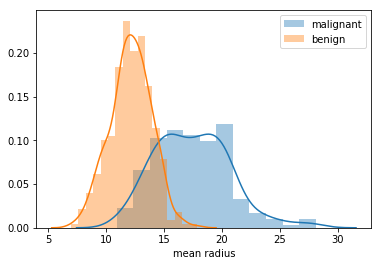

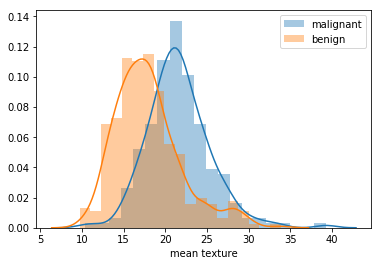

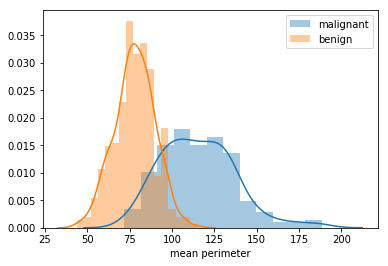

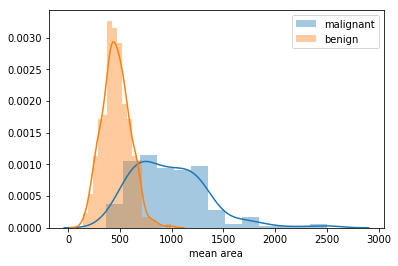

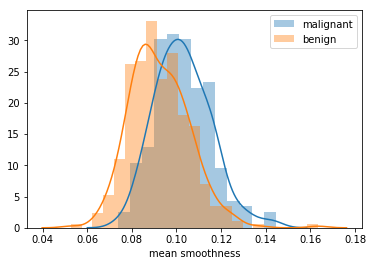

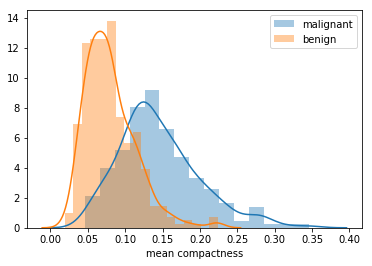

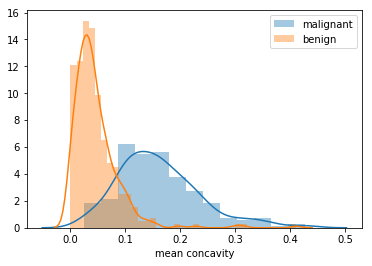

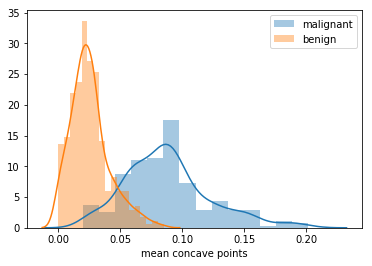

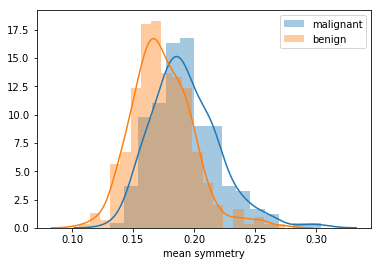

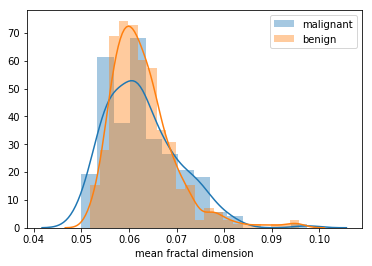

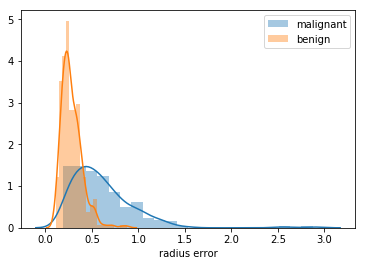

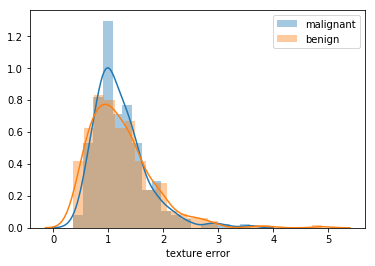

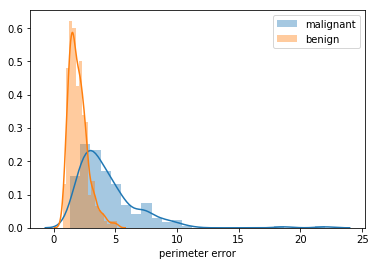

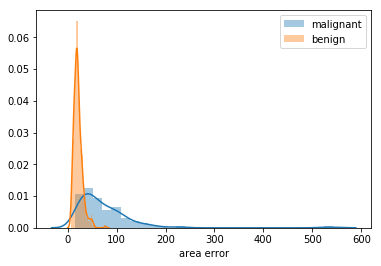

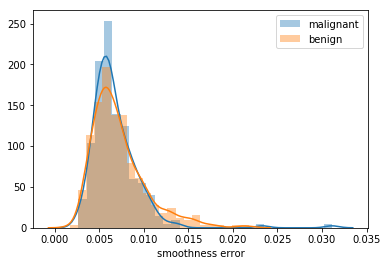

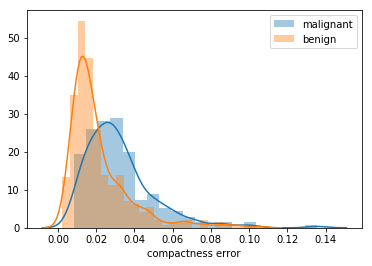

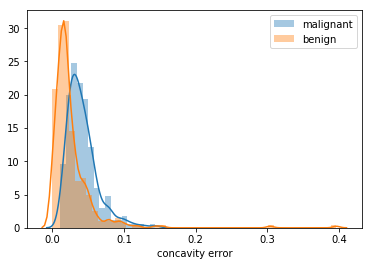

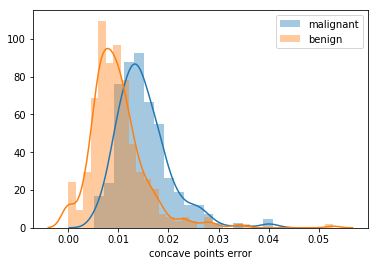

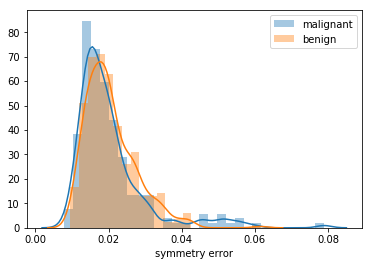

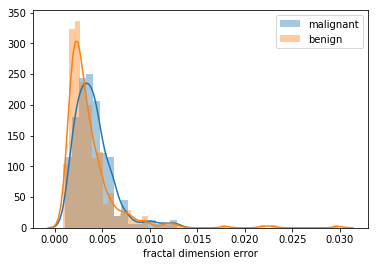

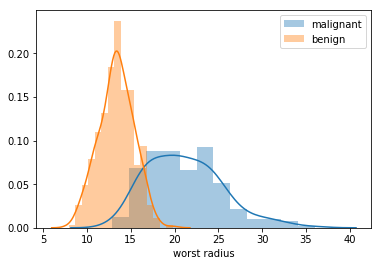

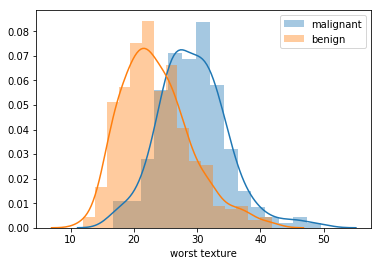

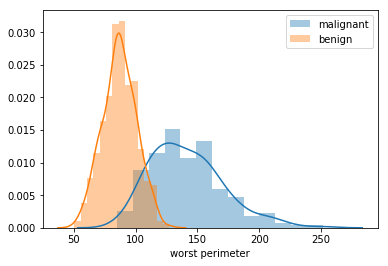

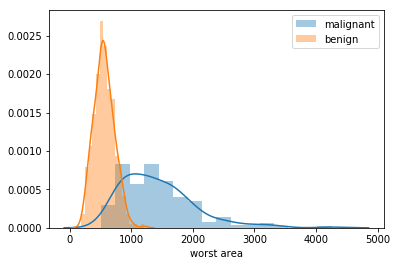

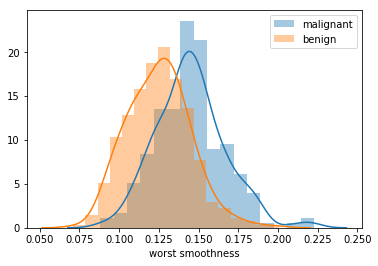

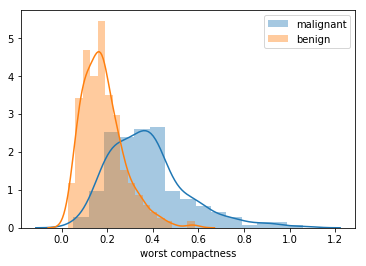

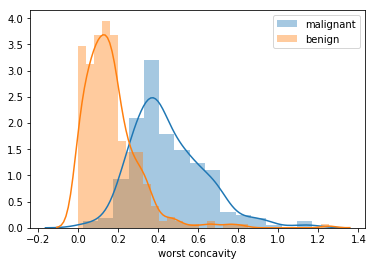

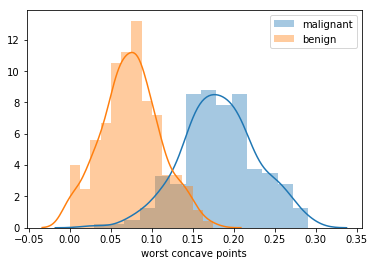

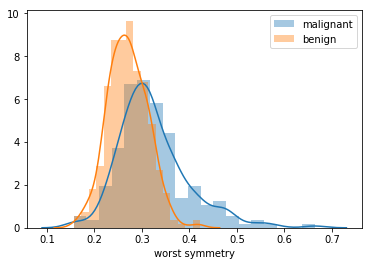

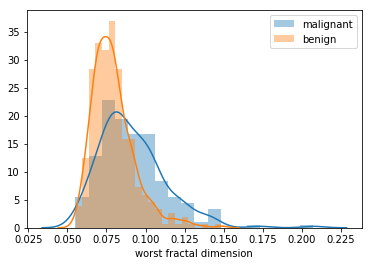

In [9]:
for item in df.drop('target', axis=1).columns:
    fig, ax = plt.subplots(nrows=1,ncols=1)
    sns.distplot(df[df['target']=='malignant'][item], ax=ax, label='malignant')
    sns.distplot(df[df['target']=='benign'][item], ax=ax, label='benign')
    plt.legend()
    

# Modelling

In [10]:
from sklearn.model_selection import train_test_split as tts, GridSearchCV
from sklearn.svm import SVC

In [11]:
X_train, X_test, y_train, y_test=tts(x,y,test_size=0.2, random_state=101)

In [12]:
model=SVC()

In [13]:
model.fit(X_train, y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

# Evaluation

In [14]:
prediction = model.predict(X_test)

In [15]:
from sklearn.metrics import classification_report

In [16]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

      benign       0.63      1.00      0.77        72
   malignant       0.00      0.00      0.00        42

   micro avg       0.63      0.63      0.63       114
   macro avg       0.32      0.50      0.39       114
weighted avg       0.40      0.63      0.49       114



C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Modelling with hyperparameter

In [17]:
param = {'gamma': [1,0.1,0.01,0.001,0.0001], 'C':[0.1,1,10,100,1000]}

In [18]:
grid = GridSearchCV(SVC(), param, cv=3, verbose=3)

In [19]:
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.1s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ...................... C=0.1, gamma=1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......... C=0.1, gamma=1, score=0.6291390728476821, total=   0.0s

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s



[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] .................... C=0.1, gamma=0.1, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.6291390728476821, total=   0.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ................... C=0.1, gamma=0.01, score=0.625, total=   0.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.6291390728476821, total=   0.0s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .................. C=0.1, gamma=0.001, score=0.625, total=   0.0s
[CV] 

[CV] ........ C=1000, gamma=1, score=0.6291390728476821, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ................... C=1000, gamma=0.1, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.6291390728476821, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .................. C=1000, gamma=0.01, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.6291390728476821, total=   0.0s
[CV] C=1000, gamma=0.001 .............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.7s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'C': [0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [20]:
grid.best_params_

{'C': 10, 'gamma': 0.0001}

In [21]:
#accuracy in gridsearch is using:
grid.best_score_

0.9428571428571428

# Modelling with hyperparameter

In [22]:
model_hype=SVC(C=10, gamma=0.0001)

In [23]:
model_hype.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
prediction_hype=model_hype.predict(X_test)
print(classification_report(y_test, prediction_hype))

              precision    recall  f1-score   support

      benign       0.92      1.00      0.96        72
   malignant       1.00      0.86      0.92        42

   micro avg       0.95      0.95      0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [27]:
from sklearn.metrics import accuracy_score

In [28]:
accuracy_score(y_test,prediction_hype)

0.9473684210526315